# Capstone Project

## 1️⃣ Project Title: Employee Well-Being in Technology Industry

Examining how work arrangements, demographics, and job-related factors impact employee health, burnout, and work-life balance in remote, hybrid, and on-site work environments.

## 2️⃣ Scoping 

Big Questions & Analytical Goals
#### 1. Relationship Between Salary and Flexibility
### Question: How do different work arrangements (Remote, Hybrid, Onsite) relate to job roles and employees’ salary levels?
Approach: Counted and compared the percentage of employees in each work arrangement category across different salary ranges and job roles.
Visualization: Use line charts to show salary trend and stalked bar chart for job role.

#### 2. Health & Well-Being
### Question: How do working hours and workload levels influence employee well-being, including burnout, social isolation, and physical/mental health?
Approach: Burnout & Social Isolation by workload level → shows well-being trends across categorical work intensity;
Physical & Mental Health Issues vs Hours Worked → shows well-being trends across numeric weekly hours.

#### 3. Key Predictors
### Question: How do job roles influence employee well-being, including mental health, physical health, work-life balance, and social isolation?
Approach: 1: Mental Health Issues (%) by Job Role → identifies roles with high mental strain;
2: Top 10 Job Roles with Highest Physical Health Issues → highlights physically demanding roles;
3: Heatmap of Social Isolation Score by Job Role → social isolation patterns across roles.
4: Distribution of High Work-Life Balance by Job Role → shows roles with high work-life balance.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Load Datasets
employee = pd.read_csv('employee_info_capstone.csv')
health = pd.read_csv('health_metrics_capstone.csv')

In [2]:
# Check Data info and shape
employee.info()
print(employee.shape)
employee.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Survey_ID         593 non-null    object
 1   Survey_Date       593 non-null    object
 2   Age               593 non-null    int64 
 3   Gender            593 non-null    object
 4   Region            588 non-null    object
 5   Job_Role          593 non-null    object
 6   Work_Arrangement  593 non-null    object
 7   Salary_Range      593 non-null    object
dtypes: int64(1), object(7)
memory usage: 37.2+ KB
(593, 8)


,Survey_ID,Survey_Date,Age,Gender,Region,Job_Role,Work_Arrangement,Salary_Range
0,SURV009,2025-06-01,30,Female,South America,Software Engineer,Remote,$60K-80K
1,SURV012,2025-06-01,64,Male,North America,Business Analyst,Remote,$40K-60K
2,SURV013,2025-06-01,25,Female,Oceania,Data Scientist,Hybrid,$80K-100K
3,SURV038,2025-06-01,42,Male,Europe,Customer Service Manager,Remote,$60K-80K
4,SURV040,2025-06-01,29,Female,Africa,Sales Representative,Hybrid,$80K-100K


In [3]:
health.info()
print(health.shape)
health.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survey_ID                593 non-null    object 
 1   Hours_Per_Week           579 non-null    float64
 2   Mental_Health_Status     436 non-null    object 
 3   Burnout_Level            593 non-null    object 
 4   Work_Life_Balance_Score  593 non-null    int64  
 5   Physical_Health_Issues   544 non-null    object 
 6   Social_Isolation_Score   593 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.6+ KB
(593, 7)


,Survey_ID,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score
0,SURV009,47.0,Anxiety,Medium,2,Neck Pain,4
1,SURV012,35.0,ADHD,Medium,3,Eye Strain; Wrist Pain,4
2,SURV013,57.0,Burnout,High,2,Back Pain; Eye Strain,1
3,SURV038,43.0,ADHD,Low,3,Eye Strain; Neck Pain,4
4,SURV040,55.0,NaN,Medium,2,Back Pain; Eye Strain,3


## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

- Handle missing values in both datasets (e.g., missing prices, order dates, or last visit dates).

In [4]:
# check for missing values for employee
print(employee.isna().sum())
# check for duplicates
print("\nTotal duplicates:", employee.duplicated(keep=False).sum())

Survey_ID           0
Survey_Date         0
Age                 0
Gender              0
Region              5
Job_Role            0
Work_Arrangement    0
Salary_Range        0
dtype: int64

Total duplicates: 0


In [5]:
# removal of categorical missing values 
# (since it only involved less than 1% in total rows, don't impact much)
employee = employee.dropna(subset=['Region'])

# Double check
print(employee['Region'].isna().sum())

0


In [6]:
# check for missing values for health
print(health.isna().sum())
# check for duplicates
print("\nTotal duplicates:", health.duplicated(keep=False).sum())

Survey_ID                    0
Hours_Per_Week              14
Mental_Health_Status       157
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues      49
Social_Isolation_Score       0
dtype: int64

Total duplicates: 0


In [7]:
# Replace NaN with meaningful category for analysis
health['Mental_Health_Status'] = health['Mental_Health_Status'].fillna('No Issue Reported')
health['Physical_Health_Issues'] = health['Physical_Health_Issues'].fillna('No Issue Reported')

In [8]:
# Check impute with mean/median in 'Hours_Per_Week'

# 1.Calculate IQR for outlier detection
Q1 = health['Hours_Per_Week'].quantile(0.25)
Q3 = health['Hours_Per_Week'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = health[(health['Hours_Per_Week'] < (Q1 - 1.5*IQR)) | (health['Hours_Per_Week'] > (Q3 + 1.5*IQR))]

print(f"Number of outliers in {'Hours_Per_Week'}: {len(outliers)}")

# Decide imputation method
if len(outliers) > 0:
    impute_value = health['Hours_Per_Week'].median()
    method = 'median (outliers present)'
else:
    impute_value = health['Hours_Per_Week'].mean()
    method = 'mean (no significant outliers)'

# Impute missing values
health['Hours_Per_Week'] = health['Hours_Per_Week'].fillna(impute_value)

print(f"Missing values in {'Hours_Per_Week'} imputed using {method}: {impute_value}")

Number of outliers in Hours_Per_Week: 0
Missing values in Hours_Per_Week imputed using mean (no significant outliers): 49.41278065630397


### Data Manipulation and Data Transformation:
- Ensure data types and formatting are consistent.
- Create new columns that are helpful for data analysis



In [9]:
# checking unique values and data type

summary_employee = []

for col in employee.columns:
    unique_vals = employee[col].unique()
    summary_employee.append({
        'Column': col,
        'Num_Unique': employee[col].nunique(),
        'Type':employee[col].dtype,
        'Sample_Unique_Values': unique_vals[:5]  # first 5 unique values
    })

summary_employee_df = pd.DataFrame(summary_employee)

# Display the summary table
print(summary_employee_df)

             Column  Num_Unique    Type  \
0         Survey_ID         588  object   
1       Survey_Date          26  object   
2               Age          44   int64   
3            Gender           4  object   
4            Region           6  object   
5          Job_Role          24  object   
6  Work_Arrangement           3  object   
7      Salary_Range           5  object   

                                Sample_Unique_Values  
0      [SURV009, SURV012, SURV013, SURV038, SURV040]  
1  [2025-06-01, 2025-06-02, 2025-06-03, 2025-06-0...  
2                               [30, 64, 25, 42, 29]  
3      [Female, Male, Non-binary, Prefer not to say]  
4  [South America, North America, Oceania, Europe...  
5  [Software Engineer, Business Analyst, Data Sci...  
6                           [Remote, Hybrid, Onsite]  
7  [$60K-80K, $40K-60K, $80K-100K, $100K-120K, $1...  


In [10]:
# Convert Survey_Date to datetime
employee['Survey_Date'] = pd.to_datetime(employee['Survey_Date'])

In [11]:
# add pure numerical column for salary for better analysis
def get_salary_midpoint(s):
    
    # Clean up symbols
    s = s.replace('$', '').replace('K', '000').replace('+', '')

    # Split by '-'
    parts = s.split('-')

    if len(parts) == 2:
        # Proper range like 40000-60000
        low = int(parts[0])
        high = int(parts[1])
        return int((low + high) / 2)
    else:
        # Single value like 100000
        return int(s)

employee['Salary_Midpoint($)'] = employee['Salary_Range'].apply(get_salary_midpoint).copy()
employee.head()

,Survey_ID,Survey_Date,Age,Gender,Region,Job_Role,Work_Arrangement,Salary_Range,Salary_Midpoint($)
0,SURV009,2025-06-01,30,Female,South America,Software Engineer,Remote,$60K-80K,70000
1,SURV012,2025-06-01,64,Male,North America,Business Analyst,Remote,$40K-60K,50000
2,SURV013,2025-06-01,25,Female,Oceania,Data Scientist,Hybrid,$80K-100K,90000
3,SURV038,2025-06-01,42,Male,Europe,Customer Service Manager,Remote,$60K-80K,70000
4,SURV040,2025-06-01,29,Female,Africa,Sales Representative,Hybrid,$80K-100K,90000


In [12]:
# checking unique values
summary_health = []

for col in health.columns:
    unique_vals = health[col].unique()
    summary_health.append({
        'Column': col,
        'Num_Unique': health[col].nunique(),
        'Type':health[col].dtype,
        'Sample_Unique_Values': unique_vals[:5]  # first 5 unique values
    })

summary_health_df = pd.DataFrame(summary_health)

# Display the summary table
print(summary_health_df)

                    Column  Num_Unique     Type  \
0                Survey_ID         593   object   
1           Hours_Per_Week          32  float64   
2     Mental_Health_Status           7   object   
3            Burnout_Level           3   object   
4  Work_Life_Balance_Score           5    int64   
5   Physical_Health_Issues          32   object   
6   Social_Isolation_Score           5    int64   

                                Sample_Unique_Values  
0      [SURV009, SURV012, SURV013, SURV038, SURV040]  
1                     [47.0, 35.0, 57.0, 43.0, 55.0]  
2  [Anxiety, ADHD, Burnout, No Issue Reported, PTSD]  
3                                [Medium, High, Low]  
4                                    [2, 3, 1, 4, 5]  
5  [Neck Pain, Eye Strain; Wrist Pain, Back Pain;...  
6                                    [4, 1, 3, 2, 5]  


In [13]:
# add new categorical column for working hours for easier compare groups or look at trends
q25 = health['Hours_Per_Week'].quantile(0.25)
q50 = health['Hours_Per_Week'].quantile(0.50)
q75 = health['Hours_Per_Week'].quantile(0.75)
q90 = health['Hours_Per_Week'].quantile(0.90)

print(f"25%: {q25}, 50% (Median): {q50}, 75%: {q75}, 90%: {q90}")

def categorize_workload(hours):
    if hours < q25:
        return 'Light(below 42h)'
    elif hours <= q50:
        return 'Standard(42-49h)'
    elif hours <= q75:
        return 'Extended(50-56h)'
    elif hours <= q90:
        return 'Heavy(57-61h)'
    else:
        return 'Overload(above 62h)'

health['Workload_Level'] = health['Hours_Per_Week'].apply(categorize_workload)

25%: 42.0, 50% (Median): 49.41278065630397, 75%: 56.0, 90%: 62.0


In [14]:
print(health['Workload_Level'].value_counts())

Workload_Level
Standard(42-49h)       179
Extended(50-56h)       140
Light(below 42h)       130
Heavy(57-61h)           99
Overload(above 62h)     45
Name: count, dtype: int64


### Data Joining:

- Join the datasets using a unique identifier.
- Perform groupby to uncover relationships between variables.


In [28]:
#merged 2 datasets
merged_df = pd.merge(employee, health, on='Survey_ID',how='left')

#add new column for mental health issues for better insight
merged_df['Mental_Health_Issues'] = merged_df['Mental_Health_Status'].apply(
    lambda x: 'Yes' if x != 'No Issue Reported' else 'No'
)
#add new column for physical health issues for better insight
merged_df = merged_df.rename(columns={'Physical_Health_Issues': 'Physical_Health_Status'})
merged_df['Physical_Health_Issues'] = merged_df['Physical_Health_Status'].apply(
    lambda x: 'Yes' if x != 'No Issue Reported' else 'No'
)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Survey_ID                588 non-null    object        
 1   Survey_Date              588 non-null    datetime64[ns]
 2   Age                      588 non-null    int64         
 3   Gender                   588 non-null    object        
 4   Region                   588 non-null    object        
 5   Job_Role                 588 non-null    object        
 6   Work_Arrangement         588 non-null    object        
 7   Salary_Range             588 non-null    object        
 8   Salary_Midpoint($)       588 non-null    int64         
 9   Hours_Per_Week           588 non-null    float64       
 10  Mental_Health_Status     588 non-null    object        
 11  Burnout_Level            588 non-null    object        
 12  Work_Life_Balance_Score  588 non-nul

## 4️⃣ Exploratory Data Analysis



### Descriptive Analysis:
- Explore overall descriptive analysis.
- Filter subsets to answer big questions.

In [16]:
#describe all the numerical variables
merged_df.describe()

,Survey_Date,Age,Salary_Midpoint($),Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,588,588.000000,588.000000,588.000000,588.000000,588.000000
mean,2025-06-13 11:13:28.163265280,43.517007,80323.129252,49.383978,2.955782,2.775510
min,2025-06-01 00:00:00,22.000000,50000.000000,35.000000,1.000000,1.000000
25%,2025-06-07 00:00:00,32.000000,70000.000000,42.000000,2.000000,2.000000
50%,2025-06-14 00:00:00,44.000000,70000.000000,49.412781,3.000000,3.000000
75%,2025-06-20 00:00:00,55.000000,90000.000000,56.000000,4.000000,4.000000
max,2025-06-26 00:00:00,65.000000,120000.000000,65.000000,5.000000,5.000000
std,NaN,12.820928,21527.629940,8.509108,1.160722,1.169143


In [17]:
#describe all the categorical variables
merged_df.describe(include='object')

,Survey_ID,Gender,Region,Job_Role,Work_Arrangement,Salary_Range,Mental_Health_Status,Burnout_Level,Physical_Health_Status,Workload_Level,Mental_Health_Issues,Physical_Health_Issues
count,588,588,588,588,588,588,588,588,588,588,588,588
unique,588,4,6,24,3,5,7,3,32,5,2,2
top,SURV009,Male,South America,Research Scientist,Hybrid,$60K-80K,No Issue Reported,Medium,Back Pain,Standard(42-49h),Yes,Yes
freq,1,295,112,34,249,208,156,234,56,178,432,540


                         Social_Isolation_Score  Work_Life_Balance_Score  \
Social_Isolation_Score                 1.000000                 0.040376   
Work_Life_Balance_Score                0.040376                 1.000000   
Age                                   -0.041796                -0.007963   
Salary_Midpoint($)                    -0.023510                -0.071013   
Hours_Per_Week                        -0.040054                 0.056714   

                              Age  Salary_Midpoint($)  Hours_Per_Week  
Social_Isolation_Score  -0.041796           -0.023510       -0.040054  
Work_Life_Balance_Score -0.007963           -0.071013        0.056714  
Age                      1.000000            0.060499       -0.006655  
Salary_Midpoint($)       0.060499            1.000000        0.043666  
Hours_Per_Week          -0.006655            0.043666        1.000000  


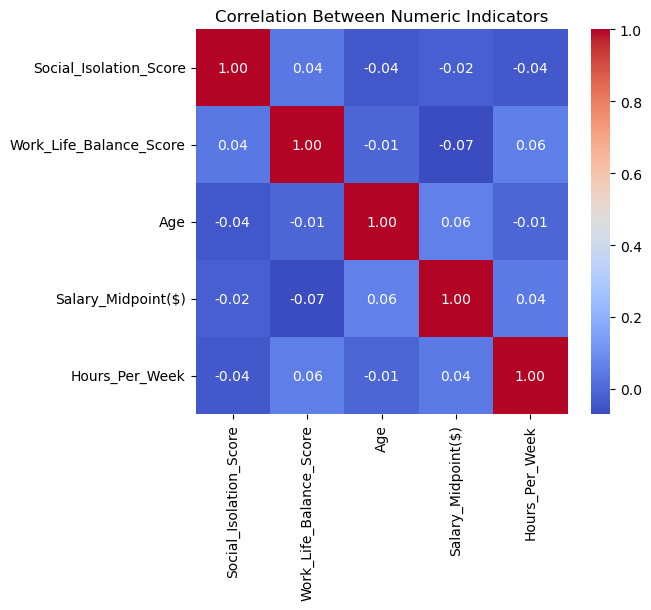

In [18]:
# Select all numeric columns 
numeric_cols = ['Social_Isolation_Score', 'Work_Life_Balance_Score','Age','Salary_Midpoint($)','Hours_Per_Week']
numeric_df = merged_df[numeric_cols]

# Correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Indicators')
plt.show()



===== Analysis by Job_Role =====

Outcome: Mental_Health_Issues
Counts:
 Mental_Health_Issues          No  Yes
Job_Role                             
Account Manager                6   12
Business Analyst               9   12
Consultant                     5   20
Content Writer                 3   12
Customer Service Manager       9   15
Data Analyst                   7   20
Data Scientist                 3   17
DevOps Engineer                7   19
Digital Marketing Specialist   8   20
Executive Assistant            4   19
Financial Analyst              6   14
HR Manager                     3   21
IT Support                    10   16
Marketing Specialist           4   17
Operations Manager             8   20
Product Manager                7   24
Project Manager                8   20
Quality Assurance              6   23
Research Scientist             9   25
Sales Representative           7   20
Social Media Manager           7   14
Software Engineer              5   18
Technical Writ

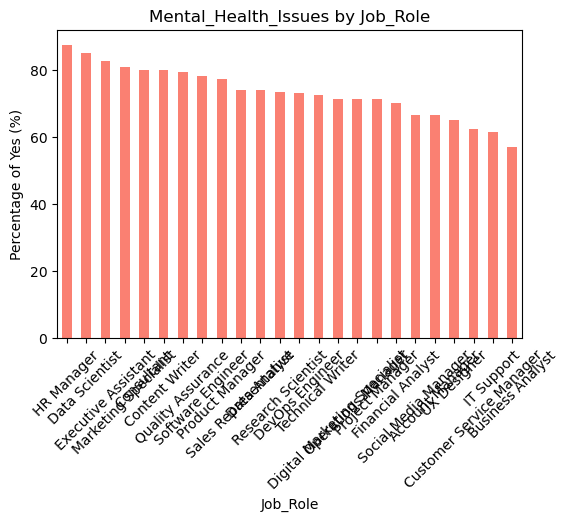


Outcome: Physical_Health_Issues
Counts:
 Physical_Health_Issues        No  Yes
Job_Role                             
Account Manager                1   17
Business Analyst               2   19
Consultant                     4   21
Content Writer                 1   14
Customer Service Manager       4   20
Data Analyst                   3   24
Data Scientist                 1   19
DevOps Engineer                0   26
Digital Marketing Specialist   4   24
Executive Assistant            3   20
Financial Analyst              2   18
HR Manager                     3   21
IT Support                     1   25
Marketing Specialist           0   21
Operations Manager             2   26
Product Manager                3   28
Project Manager                2   26
Quality Assurance              2   27
Research Scientist             1   33
Sales Representative           1   26
Social Media Manager           1   20
Software Engineer              1   22
Technical Writer               5   24
UX Desig

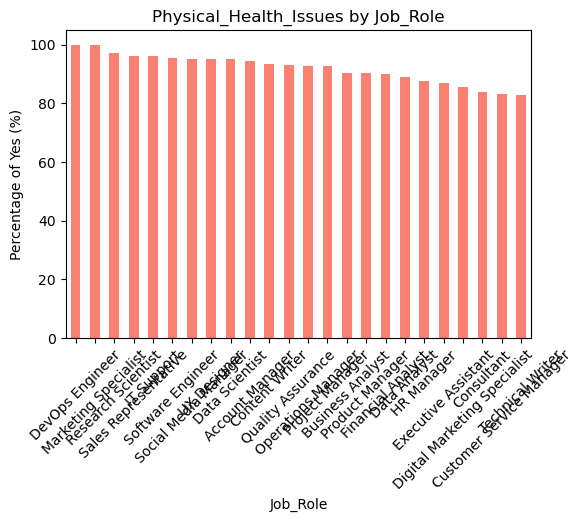


Outcome: Burnout_Level
Counts:
 Burnout_Level                 High  Low  Medium
Job_Role                                       
Account Manager                  2    7       9
Business Analyst                10    4       7
Consultant                       9    6      10
Content Writer                   6    4       5
Customer Service Manager        10    3      11
Data Analyst                     8    5      14
Data Scientist                   5    6       9
DevOps Engineer                 11    7       8
Digital Marketing Specialist    11    9       8
Executive Assistant              9    6       8
Financial Analyst                8    4       8
HR Manager                      11    5       8
IT Support                      14    2      10
Marketing Specialist             5    4      12
Operations Manager              12    6      10
Product Manager                 12    8      11
Project Manager                  9    6      13
Quality Assurance               12    8       9
Researc

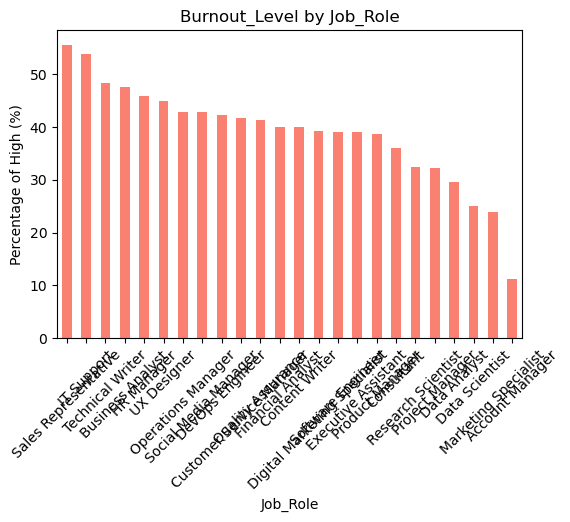


Outcome: Work_Life_Balance_Score
Counts:
 WLB_Level                     High  Low
Job_Role                               
Account Manager                 11    7
Business Analyst                13    8
Consultant                      15   10
Content Writer                  14    1
Customer Service Manager        20    4
Data Analyst                    15   12
Data Scientist                  12    8
DevOps Engineer                 20    6
Digital Marketing Specialist    19    9
Executive Assistant             13   10
Financial Analyst                9   11
HR Manager                      14   10
IT Support                      17    9
Marketing Specialist            18    3
Operations Manager              18   10
Product Manager                 16   15
Project Manager                 21    7
Quality Assurance               23    6
Research Scientist              23   11
Sales Representative            23    4
Social Media Manager            11   10
Software Engineer               14   

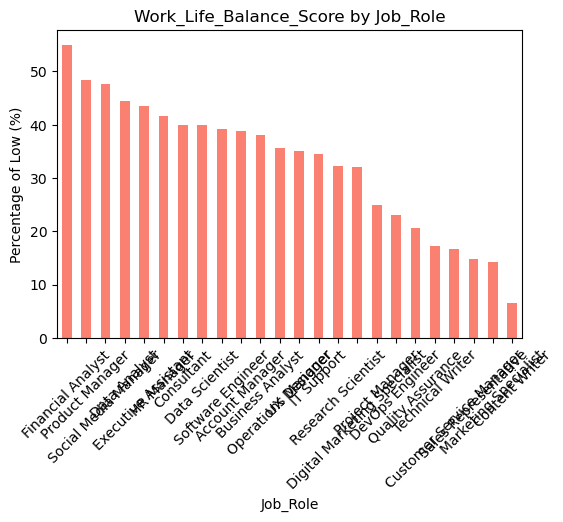


Outcome: Social_Isolation_Score
Counts:
 SIS_Level                     High  Low
Job_Role                               
Account Manager                  3   15
Business Analyst                 7   14
Consultant                       3   22
Content Writer                   3   12
Customer Service Manager         7   17
Data Analyst                     9   18
Data Scientist                   8   12
DevOps Engineer                  9   17
Digital Marketing Specialist    10   18
Executive Assistant              7   16
Financial Analyst                3   17
HR Manager                       6   18
IT Support                       6   20
Marketing Specialist             4   17
Operations Manager               5   23
Product Manager                  8   23
Project Manager                 10   18
Quality Assurance               10   19
Research Scientist               7   27
Sales Representative            11   16
Social Media Manager             2   19
Software Engineer                6   1

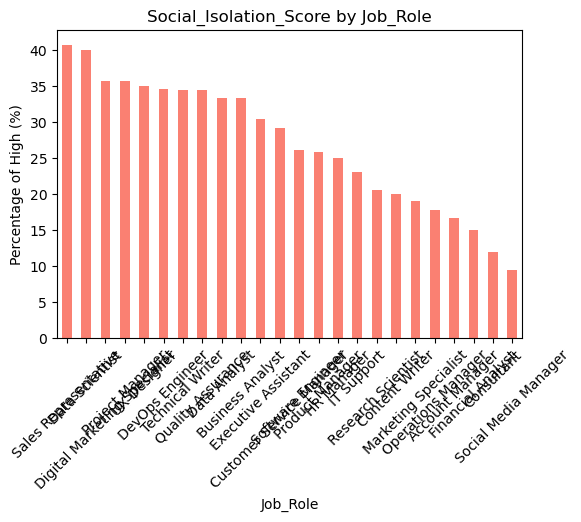


===== Analysis by Hours_Per_Week =====

Outcome: Mental_Health_Issues
Counts:
 Mental_Health_Issues  No  Yes
Hours_Per_Week               
35.000000              4   16
36.000000              7    9
37.000000              1   18
38.000000              3    7
39.000000              7   13
40.000000              3   13
41.000000              4   24
42.000000              5   16
43.000000              9   21
44.000000              6   15
45.000000              8   19
46.000000              4    8
47.000000              6   12
48.000000              1   12
49.000000              3   19
49.412781              5    9
50.000000              9   16
51.000000              5    8
52.000000              4   11
53.000000              4   23
54.000000              6   11
55.000000              6   19
56.000000              6   12
57.000000              4   12
58.000000              5   11
59.000000              5   14
60.000000              6   12
61.000000              4    8
62.000000           

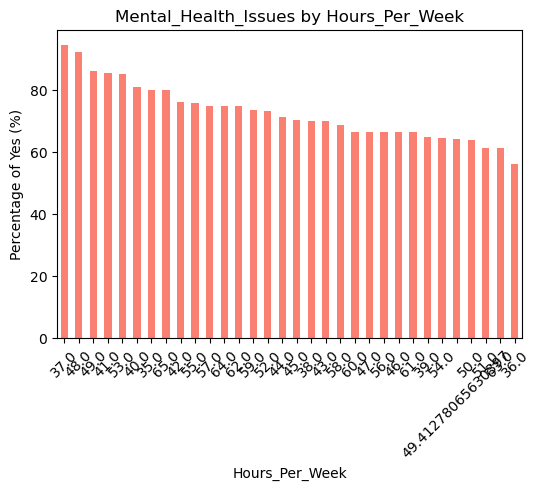


Outcome: Physical_Health_Issues
Counts:
 Physical_Health_Issues  No  Yes
Hours_Per_Week                 
35.000000                0   20
36.000000                0   16
37.000000                2   17
38.000000                1    9
39.000000                1   19
40.000000                0   16
41.000000                3   25
42.000000                1   20
43.000000                4   26
44.000000                1   20
45.000000                5   22
46.000000                2   10
47.000000                4   14
48.000000                1   12
49.000000                3   19
49.412781                1   13
50.000000                1   24
51.000000                0   13
52.000000                1   14
53.000000                4   23
54.000000                0   17
55.000000                3   22
56.000000                1   17
57.000000                1   15
58.000000                1   15
59.000000                1   18
60.000000                0   18
61.000000                1   1

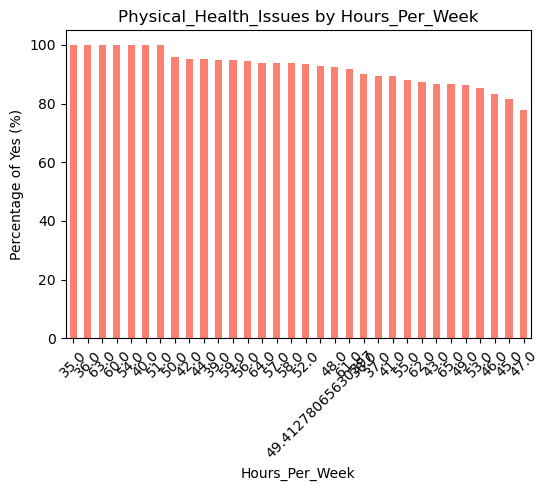


Outcome: Burnout_Level
Counts:
 Burnout_Level   High  Low  Medium
Hours_Per_Week                   
35.000000         10    3       7
36.000000          3    5       8
37.000000          9    1       9
38.000000          3    4       3
39.000000          7    2      11
40.000000          9    2       5
41.000000          8    9      11
42.000000         11    3       7
43.000000         14    5      11
44.000000          9    4       8
45.000000         10    7      10
46.000000          6    1       5
47.000000          6    3       9
48.000000          4    3       6
49.000000          6   11       5
49.412781          6    1       7
50.000000          9    6      10
51.000000          5    4       4
52.000000          4    3       8
53.000000         12    8       7
54.000000          5    3       9
55.000000          9    4      12
56.000000          7    4       7
57.000000          7    3       6
58.000000          7    2       7
59.000000          7    4       8
60.000000      

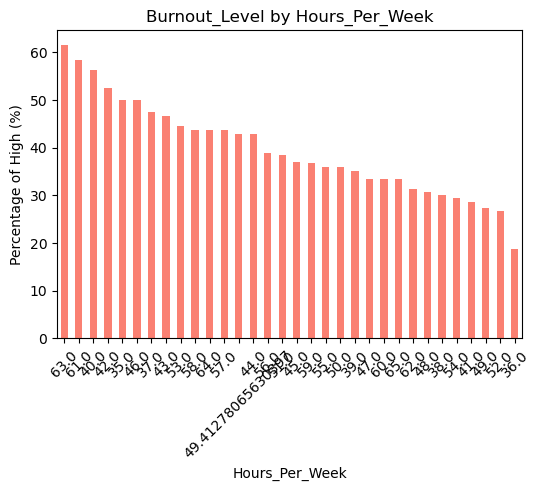


Outcome: Work_Life_Balance_Score
Counts:
 WLB_Level       High  Low
Hours_Per_Week           
35.000000         12    8
36.000000         12    4
37.000000         13    6
38.000000          5    5
39.000000         15    5
40.000000          9    7
41.000000         14   14
42.000000         14    7
43.000000         21    9
44.000000         16    5
45.000000         19    8
46.000000         11    1
47.000000         14    4
48.000000          5    8
49.000000          9   13
49.412781          9    5
50.000000         18    7
51.000000          8    5
52.000000         13    2
53.000000         17   10
54.000000         10    7
55.000000         17    8
56.000000         12    6
57.000000         10    6
58.000000          9    7
59.000000         12    7
60.000000         12    6
61.000000         10    2
62.000000         12    4
63.000000         11    2
64.000000         14    2
65.000000         13    2

Percentages:
 WLB_Level            High        Low
Hours_Per_Week       

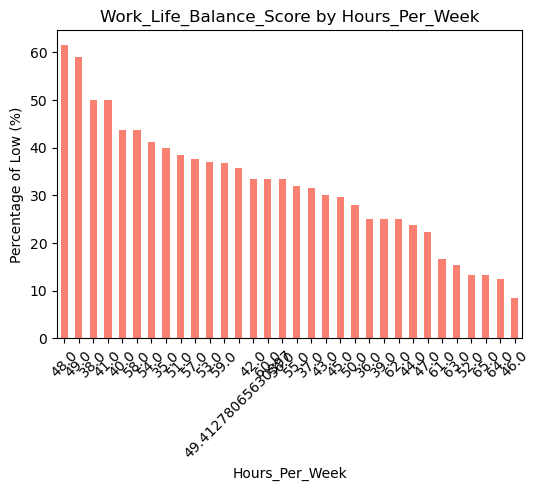


Outcome: Social_Isolation_Score
Counts:
 SIS_Level       High  Low
Hours_Per_Week           
35.000000          3   17
36.000000          5   11
37.000000          8   11
38.000000          2    8
39.000000         10   10
40.000000          6   10
41.000000          5   23
42.000000         14    7
43.000000          6   24
44.000000          6   15
45.000000          5   22
46.000000          3    9
47.000000          5   13
48.000000          1   12
49.000000          6   16
49.412781          6    8
50.000000          8   17
51.000000          4    9
52.000000          3   12
53.000000          9   18
54.000000          5   12
55.000000          4   21
56.000000          5   13
57.000000          2   14
58.000000          3   13
59.000000          6   13
60.000000          4   14
61.000000          2   10
62.000000          3   13
63.000000          3   10
64.000000          2   14
65.000000          7    8

Percentages:
 SIS_Level            High        Low
Hours_Per_Week        

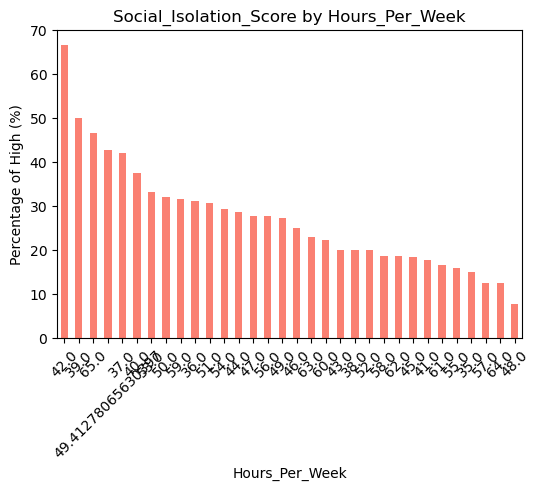


===== Analysis by Salary_Midpoint($) =====

Outcome: Mental_Health_Issues
Counts:
 Mental_Health_Issues  No  Yes
Salary_Midpoint($)           
50000                 36   73
70000                 55  153
90000                 34  117
110000                18   59
120000                13   30

Percentages:
 Mental_Health_Issues         No        Yes
Salary_Midpoint($)                        
50000                 33.027523  66.972477
70000                 26.442308  73.557692
90000                 22.516556  77.483444
110000                23.376623  76.623377
120000                30.232558  69.767442

Ranking by 'Yes' percentage:
 Salary_Midpoint($)
90000     77.483444
110000    76.623377
70000     73.557692
120000    69.767442
50000     66.972477
Name: Yes, dtype: float64


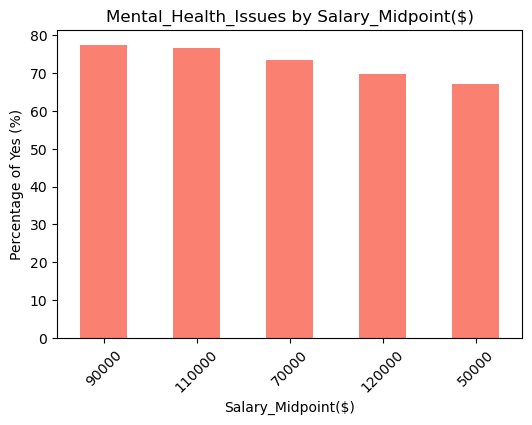


Outcome: Physical_Health_Issues
Counts:
 Physical_Health_Issues  No  Yes
Salary_Midpoint($)             
50000                    7  102
70000                   21  187
90000                   10  141
110000                   6   71
120000                   4   39

Percentages:
 Physical_Health_Issues         No        Yes
Salary_Midpoint($)                          
50000                    6.422018  93.577982
70000                   10.096154  89.903846
90000                    6.622517  93.377483
110000                   7.792208  92.207792
120000                   9.302326  90.697674

Ranking by 'Yes' percentage:
 Salary_Midpoint($)
50000     93.577982
90000     93.377483
110000    92.207792
120000    90.697674
70000     89.903846
Name: Yes, dtype: float64


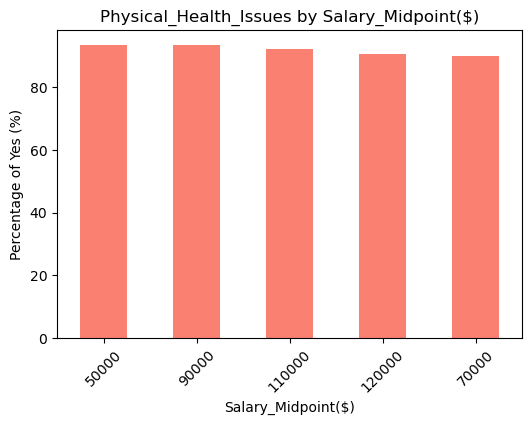


Outcome: Burnout_Level
Counts:
 Burnout_Level       High  Low  Medium
Salary_Midpoint($)                   
50000                 50   13      46
70000                 76   58      74
90000                 55   30      66
110000                32   14      31
120000                18    8      17

Percentages:
 Burnout_Level            High        Low     Medium
Salary_Midpoint($)                                 
50000               45.871560  11.926606  42.201835
70000               36.538462  27.884615  35.576923
90000               36.423841  19.867550  43.708609
110000              41.558442  18.181818  40.259740
120000              41.860465  18.604651  39.534884

Ranking by 'High' percentage:
 Salary_Midpoint($)
50000     45.871560
120000    41.860465
110000    41.558442
70000     36.538462
90000     36.423841
Name: High, dtype: float64


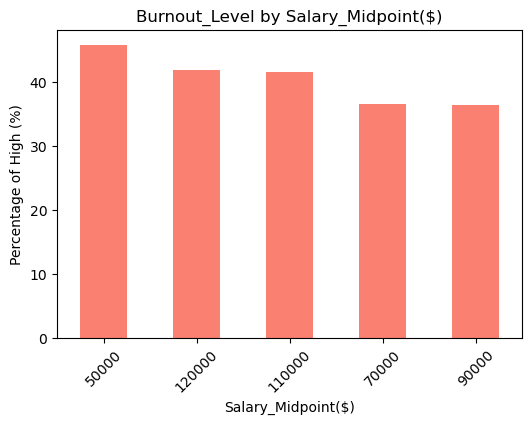


Outcome: Work_Life_Balance_Score
Counts:
 WLB_Level           High  Low
Salary_Midpoint($)           
50000                 76   33
70000                141   67
90000                102   49
110000                49   28
120000                28   15

Percentages:
 WLB_Level                High        Low
Salary_Midpoint($)                      
50000               69.724771  30.275229
70000               67.788462  32.211538
90000               67.549669  32.450331
110000              63.636364  36.363636
120000              65.116279  34.883721

Ranking by 'Low' percentage:
 Salary_Midpoint($)
110000    36.363636
120000    34.883721
90000     32.450331
70000     32.211538
50000     30.275229
Name: Low, dtype: float64


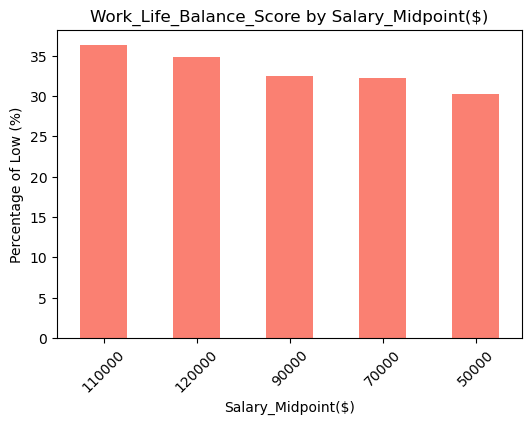


Outcome: Social_Isolation_Score
Counts:
 SIS_Level           High  Low
Salary_Midpoint($)           
50000                 28   81
70000                 55  153
90000                 44  107
110000                20   57
120000                14   29

Percentages:
 SIS_Level                High        Low
Salary_Midpoint($)                      
50000               25.688073  74.311927
70000               26.442308  73.557692
90000               29.139073  70.860927
110000              25.974026  74.025974
120000              32.558140  67.441860

Ranking by 'High' percentage:
 Salary_Midpoint($)
120000    32.558140
90000     29.139073
70000     26.442308
110000    25.974026
50000     25.688073
Name: High, dtype: float64


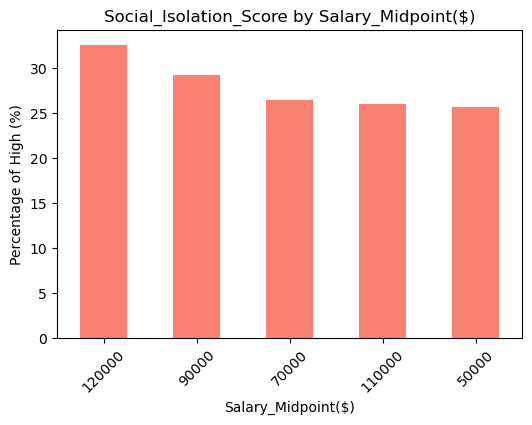


===== Analysis by Work_Arrangement =====

Outcome: Mental_Health_Issues
Counts:
 Mental_Health_Issues  No  Yes
Work_Arrangement             
Hybrid                61  188
Onsite                33  108
Remote                62  136

Percentages:
 Mental_Health_Issues         No        Yes
Work_Arrangement                          
Hybrid                24.497992  75.502008
Onsite                23.404255  76.595745
Remote                31.313131  68.686869

Ranking by 'Yes' percentage:
 Work_Arrangement
Onsite    76.595745
Hybrid    75.502008
Remote    68.686869
Name: Yes, dtype: float64


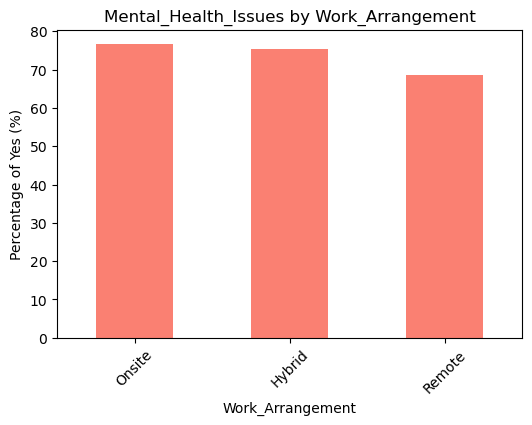


Outcome: Physical_Health_Issues
Counts:
 Physical_Health_Issues  No  Yes
Work_Arrangement               
Hybrid                  24  225
Onsite                   9  132
Remote                  15  183

Percentages:
 Physical_Health_Issues        No        Yes
Work_Arrangement                           
Hybrid                  9.638554  90.361446
Onsite                  6.382979  93.617021
Remote                  7.575758  92.424242

Ranking by 'Yes' percentage:
 Work_Arrangement
Onsite    93.617021
Remote    92.424242
Hybrid    90.361446
Name: Yes, dtype: float64


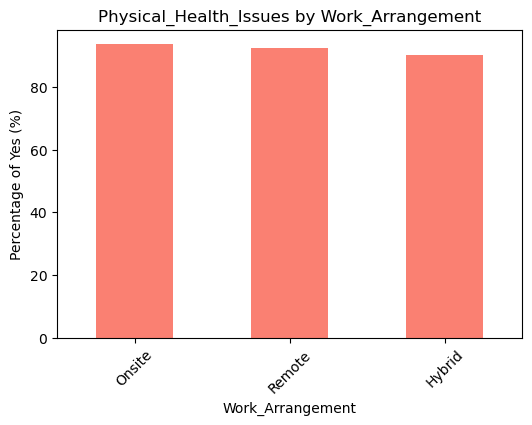


Outcome: Burnout_Level
Counts:
 Burnout_Level     High  Low  Medium
Work_Arrangement                   
Hybrid              92   44     113
Onsite              37   48      56
Remote             102   31      65

Percentages:
 Burnout_Level          High        Low     Medium
Work_Arrangement                                 
Hybrid            36.947791  17.670683  45.381526
Onsite            26.241135  34.042553  39.716312
Remote            51.515152  15.656566  32.828283

Ranking by 'High' percentage:
 Work_Arrangement
Remote    51.515152
Hybrid    36.947791
Onsite    26.241135
Name: High, dtype: float64


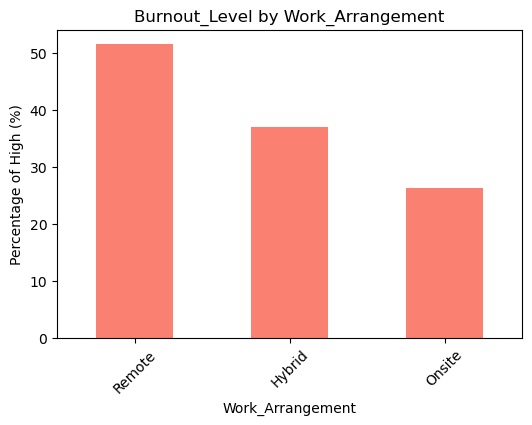


Outcome: Work_Life_Balance_Score
Counts:
 WLB_Level         High  Low
Work_Arrangement           
Hybrid             170   79
Onsite              98   43
Remote             128   70

Percentages:
 WLB_Level              High        Low
Work_Arrangement                      
Hybrid            68.273092  31.726908
Onsite            69.503546  30.496454
Remote            64.646465  35.353535

Ranking by 'Low' percentage:
 Work_Arrangement
Remote    35.353535
Hybrid    31.726908
Onsite    30.496454
Name: Low, dtype: float64


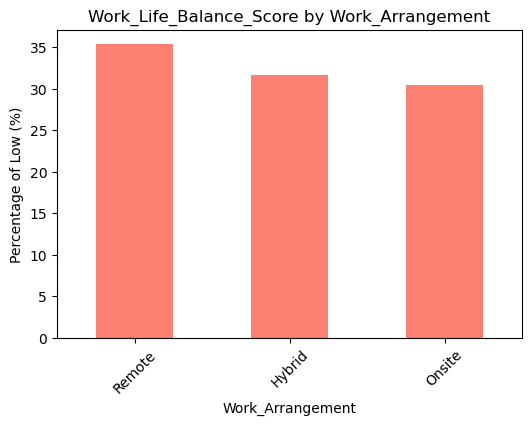


Outcome: Social_Isolation_Score
Counts:
 SIS_Level         High  Low
Work_Arrangement           
Hybrid              54  195
Onsite              13  128
Remote              94  104

Percentages:
 SIS_Level              High        Low
Work_Arrangement                      
Hybrid            21.686747  78.313253
Onsite             9.219858  90.780142
Remote            47.474747  52.525253

Ranking by 'High' percentage:
 Work_Arrangement
Remote    47.474747
Hybrid    21.686747
Onsite     9.219858
Name: High, dtype: float64


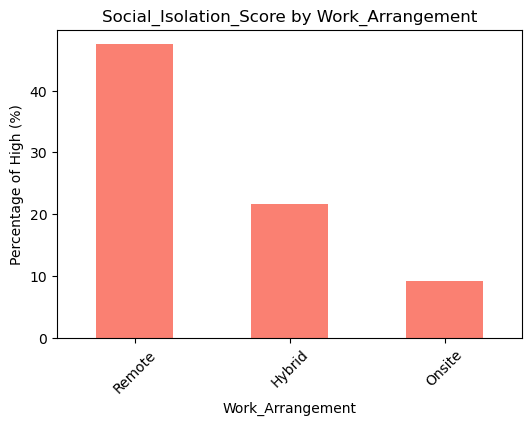


===== Analysis by Region =====

Outcome: Mental_Health_Issues
Counts:
 Mental_Health_Issues  No  Yes
Region                       
Africa                19   83
Asia                  20   67
Europe                25   71
North America         26   60
Oceania               33   72
South America         33   79

Percentages:
 Mental_Health_Issues         No        Yes
Region                                    
Africa                18.627451  81.372549
Asia                  22.988506  77.011494
Europe                26.041667  73.958333
North America         30.232558  69.767442
Oceania               31.428571  68.571429
South America         29.464286  70.535714

Ranking by 'Yes' percentage:
 Region
Africa           81.372549
Asia             77.011494
Europe           73.958333
South America    70.535714
North America    69.767442
Oceania          68.571429
Name: Yes, dtype: float64


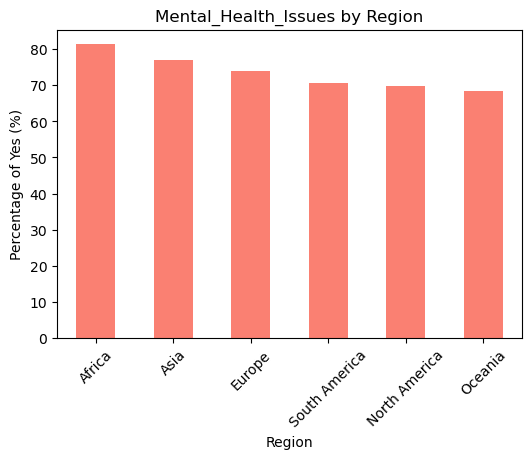


Outcome: Physical_Health_Issues
Counts:
 Physical_Health_Issues  No  Yes
Region                         
Africa                   8   94
Asia                     5   82
Europe                   4   92
North America            4   82
Oceania                 13   92
South America           14   98

Percentages:
 Physical_Health_Issues         No        Yes
Region                                      
Africa                   7.843137  92.156863
Asia                     5.747126  94.252874
Europe                   4.166667  95.833333
North America            4.651163  95.348837
Oceania                 12.380952  87.619048
South America           12.500000  87.500000

Ranking by 'Yes' percentage:
 Region
Europe           95.833333
North America    95.348837
Asia             94.252874
Africa           92.156863
Oceania          87.619048
South America    87.500000
Name: Yes, dtype: float64


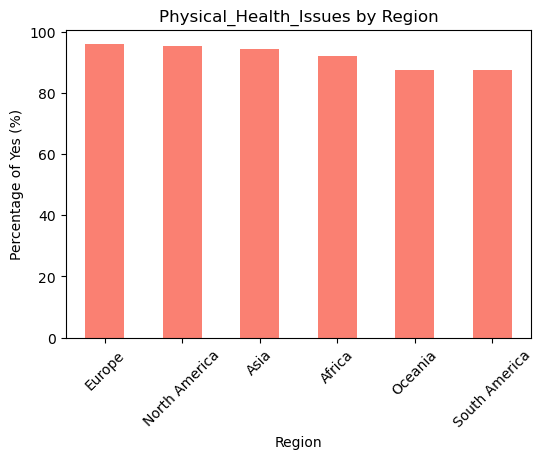


Outcome: Burnout_Level
Counts:
 Burnout_Level  High  Low  Medium
Region                          
Africa           32   23      47
Asia             39   11      37
Europe           36   23      37
North America    36   21      29
Oceania          44   22      39
South America    44   23      45

Percentages:
 Burnout_Level       High        Low     Medium
Region                                        
Africa         31.372549  22.549020  46.078431
Asia           44.827586  12.643678  42.528736
Europe         37.500000  23.958333  38.541667
North America  41.860465  24.418605  33.720930
Oceania        41.904762  20.952381  37.142857
South America  39.285714  20.535714  40.178571

Ranking by 'High' percentage:
 Region
Asia             44.827586
Oceania          41.904762
North America    41.860465
South America    39.285714
Europe           37.500000
Africa           31.372549
Name: High, dtype: float64


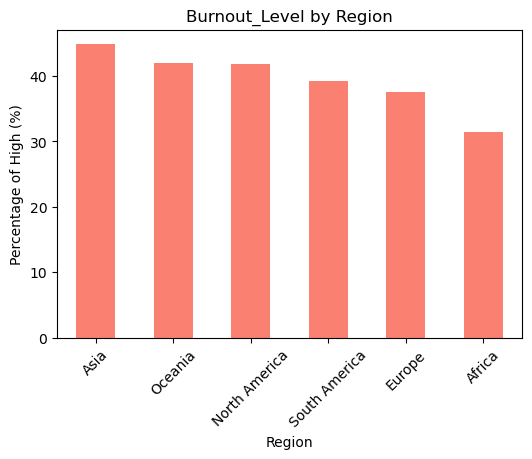


Outcome: Work_Life_Balance_Score
Counts:
 WLB_Level      High  Low
Region                  
Africa           62   40
Asia             69   18
Europe           72   24
North America    58   28
Oceania          61   44
South America    74   38

Percentages:
 WLB_Level           High        Low
Region                             
Africa         60.784314  39.215686
Asia           79.310345  20.689655
Europe         75.000000  25.000000
North America  67.441860  32.558140
Oceania        58.095238  41.904762
South America  66.071429  33.928571

Ranking by 'Low' percentage:
 Region
Oceania          41.904762
Africa           39.215686
South America    33.928571
North America    32.558140
Europe           25.000000
Asia             20.689655
Name: Low, dtype: float64


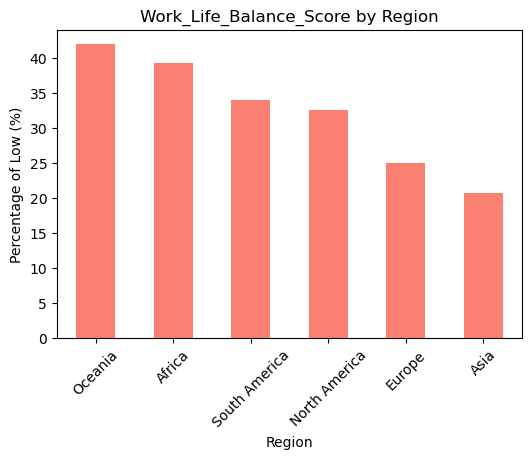


Outcome: Social_Isolation_Score
Counts:
 SIS_Level      High  Low
Region                  
Africa           35   67
Asia             24   63
Europe           21   75
North America    20   66
Oceania          29   76
South America    32   80

Percentages:
 SIS_Level           High        Low
Region                             
Africa         34.313725  65.686275
Asia           27.586207  72.413793
Europe         21.875000  78.125000
North America  23.255814  76.744186
Oceania        27.619048  72.380952
South America  28.571429  71.428571

Ranking by 'High' percentage:
 Region
Africa           34.313725
South America    28.571429
Oceania          27.619048
Asia             27.586207
North America    23.255814
Europe           21.875000
Name: High, dtype: float64


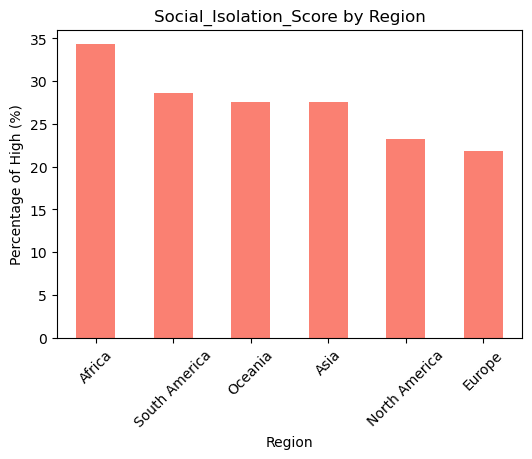

In [19]:
# Filter subsets across factors and outcomes to have some overall insights

import pandas as pd
import matplotlib.pyplot as plt

# Define factors and outcomes
factors = ['Job_Role', 'Hours_Per_Week', 'Salary_Midpoint($)','Work_Arrangement','Region']  
outcomes = {
    'Mental_Health_Issues': 'Yes',   
    'Physical_Health_Issues': 'Yes',  
    'Burnout_Level': 'High',            
    'Work_Life_Balance_Score': 'Low',   
    'Social_Isolation_Score': 'High',   
}

# Define thresholds
low_wlb_threshold = 3
high_sis_threshold = 3

# Loop through factors and outcomes
for factor in factors:
    print(f"\n===== Analysis by {factor} =====")
    
    for outcome, target in outcomes.items():
        print(f"\nOutcome: {outcome}")
        
        # define target value for numerical value :Work_Life_Balance_Score, Social_Isolation_Score
        if outcome == 'Work_Life_Balance_Score':
            merged_df['WLB_Level'] = merged_df['Work_Life_Balance_Score'].apply(lambda x: 'Low' if x < low_wlb_threshold else 'High')
            series_to_use = 'WLB_Level'
            target_value = 'Low'
        elif outcome == 'Social_Isolation_Score':
            merged_df['SIS_Level'] = merged_df['Social_Isolation_Score'].apply(lambda x: 'High' if x > high_sis_threshold else 'Low')
            series_to_use = 'SIS_Level'
            target_value = 'High'
        else:
            series_to_use = outcome
            target_value = target
        
        # Count & percentage
        counts = merged_df.groupby(factor)[series_to_use].value_counts().unstack(fill_value=0)
        percent = merged_df.groupby(factor)[series_to_use].value_counts(normalize=True).unstack(fill_value=0) * 100
        
        print("Counts:\n", counts)
        print("\nPercentages:\n", percent)
        
        # Ranking
        if target_value in percent.columns:
            ranking = percent[target_value].sort_values(ascending=False)
            print(f"\nRanking by '{target_value}' percentage:\n", ranking)
            
            # Bar chart
            ranking.plot(kind='bar', figsize=(6,4), color='salmon')
            plt.ylabel(f'Percentage of {target_value} (%)')
            plt.title(f'{outcome} by {factor}')
            plt.xticks(rotation=45)
            plt.show()


### Data Visualisation:
- Visualise data in graphs to better understand the data.

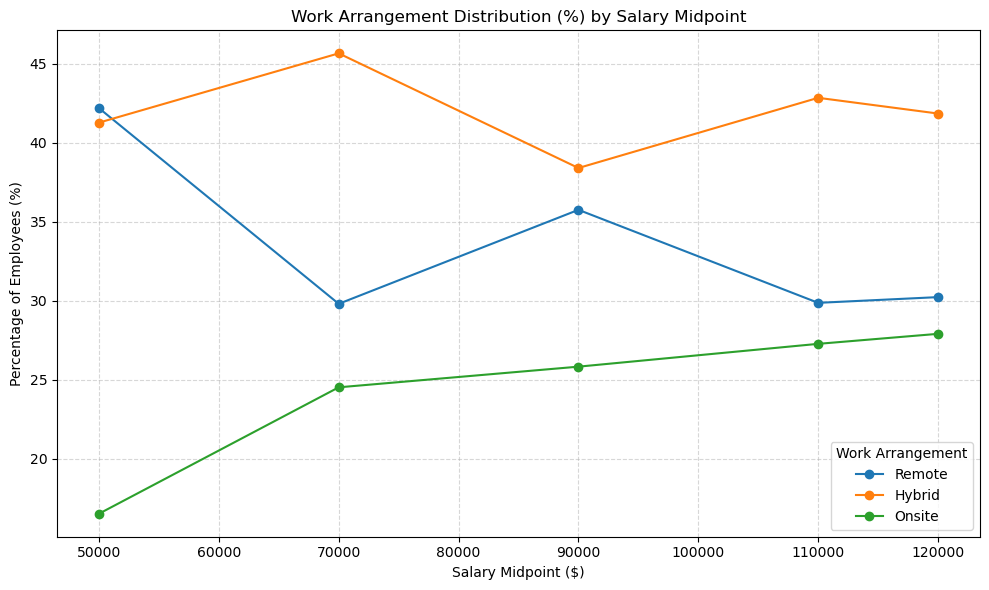

In [20]:
#First Big Question: Salary Midpoint vs Work Arrangement

import pandas as pd
import matplotlib.pyplot as plt

# 1. Group by Salary Midpoint and Work Arrangement → count employees
salary_work_mode = (
    merged_df.groupby(['Salary_Midpoint($)', 'Work_Arrangement'])
    .size()
    .unstack(fill_value=0)
)

# 2. Convert counts to percentages for each salary level
salary_work_mode_pct = salary_work_mode.div(salary_work_mode.sum(axis=1), axis=0) * 100

# 3. Sort by salary for better line flow
salary_work_mode_pct = salary_work_mode_pct.sort_index()

# 4. Plot the line chart
plt.figure(figsize=(10, 6))
for mode in ['Remote', 'Hybrid', 'Onsite']:
    plt.plot(salary_work_mode_pct.index, salary_work_mode_pct[mode], marker='o', label=mode)

plt.title('Work Arrangement Distribution (%) by Salary Midpoint')
plt.xlabel('Salary Midpoint ($)')
plt.ylabel('Percentage of Employees (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Work Arrangement')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

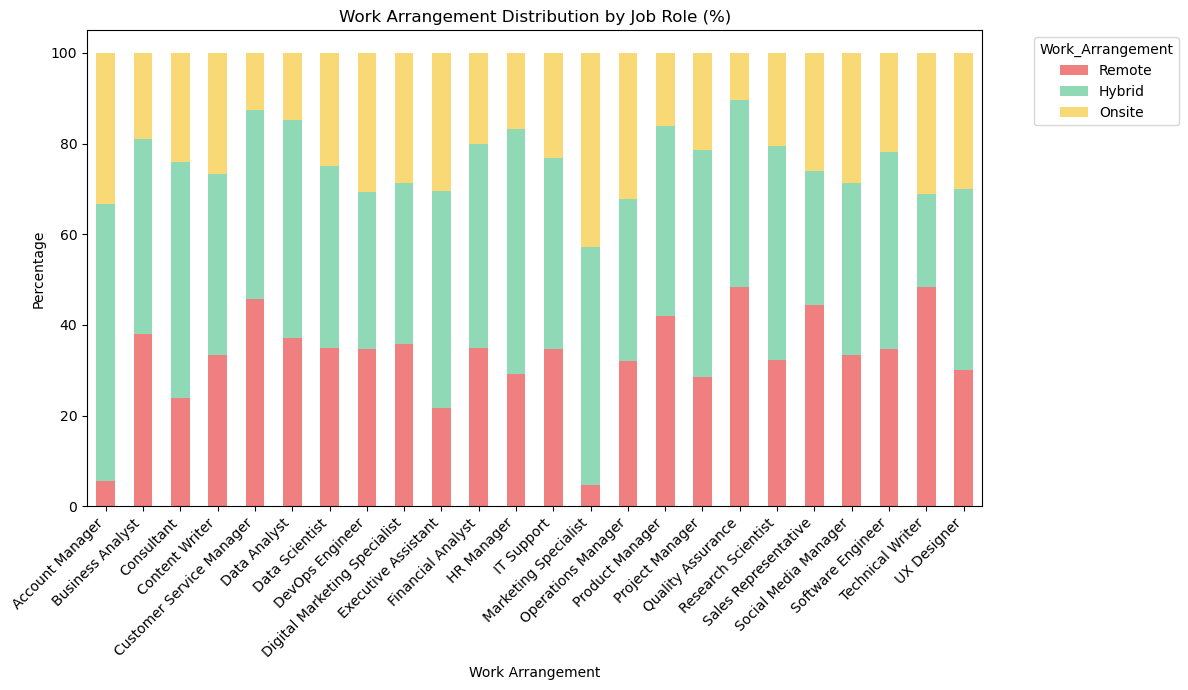

In [21]:
#First Big Question: Job role vs Work Arrangement

import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a crosstab: percentage distribution of burnout levels per job role
burnout_crosstab = pd.crosstab(
    merged_df['Job_Role'],
    merged_df['Work_Arrangement'],
    normalize='index'   # normalize row-wise
) * 100

# reorder columns
burnout_crosstab = burnout_crosstab[['Remote', 'Hybrid','Onsite']]

# 2. Plot stacked bar chart
plt.figure(figsize=(12, 7))
burnout_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=['#f08080','#8fd9b6', '#f9d976' ] 
)

plt.title('Work Arrangement Distribution by Job Role (%)')
plt.ylabel('Percentage')
plt.xlabel('Work Arrangement')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Work_Arrangement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


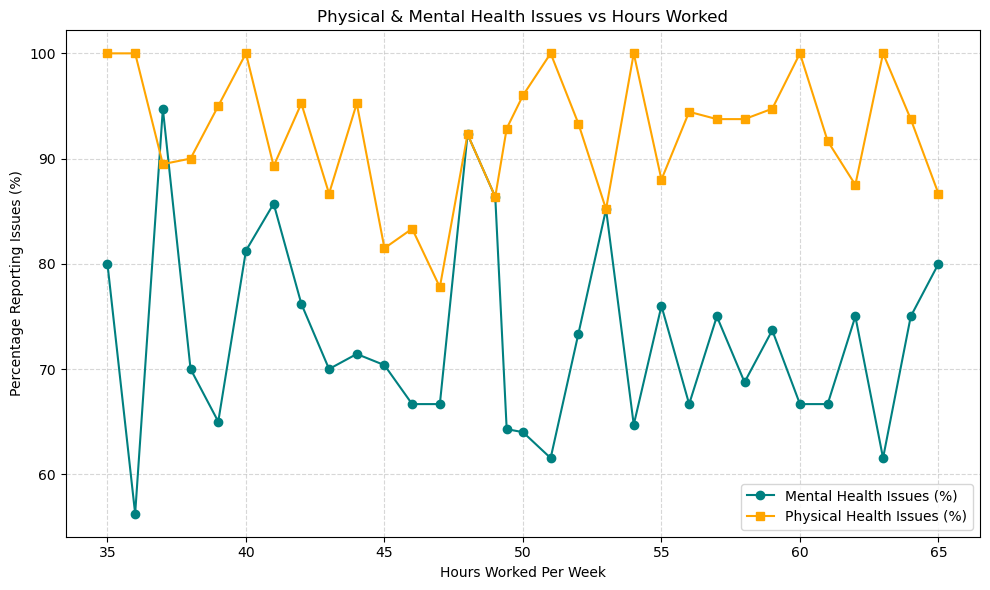

In [22]:
#Second Big Question : Working hours vs Mental and Physical Health Issues

import matplotlib.pyplot as plt
import pandas as pd

# ---1. Prepare Data ---
# Mental health issues (%)
mental_by_hours = (
    merged_df.groupby('Hours_Per_Week')['Mental_Health_Issues']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reset_index(name='Mental_Health_Percent')
)

# Physical health issues (%)
physical_by_hours = (
    merged_df.groupby('Hours_Per_Week')['Physical_Health_Issues']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reset_index(name='Physical_Health_Percent')
)

# Merge both
health_by_hours = pd.merge(mental_by_hours, physical_by_hours, on='Hours_Per_Week', how='inner')
health_by_hours = health_by_hours.sort_values('Hours_Per_Week')

# --- Plot ---
plt.figure(figsize=(10,6))

# Mental line
plt.plot(
    health_by_hours['Hours_Per_Week'],
    health_by_hours['Mental_Health_Percent'],
    marker='o', linestyle='-', color='teal', label='Mental Health Issues (%)'
)

# Physical line
plt.plot(
    health_by_hours['Hours_Per_Week'],
    health_by_hours['Physical_Health_Percent'],
    marker='s', linestyle='-', color='orange', label='Physical Health Issues (%)'
)

# ---Aesthetics ---
plt.title('Physical & Mental Health Issues vs Hours Worked')
plt.xlabel('Hours Worked Per Week')
plt.ylabel('Percentage Reporting Issues (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/b6/sfjnr9lj2hqb4b92g2bmg4bc0000gn/T/ipykernel_70606/3265903996.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('Workload_Level')['Social_Isolation_Score']
/var/folders/b6/sfjnr9lj2hqb4b92g2bmg4bc0000gn/T/ipykernel_70606/3265903996.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_burnout_score = merged_df.groupby('Workload_Level')['Burnout_Score'].mean()
/var/folders/b6/sfjnr9lj2hqb4b92g2bmg4bc0000gn/T/ipykernel_70606/3265903996.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

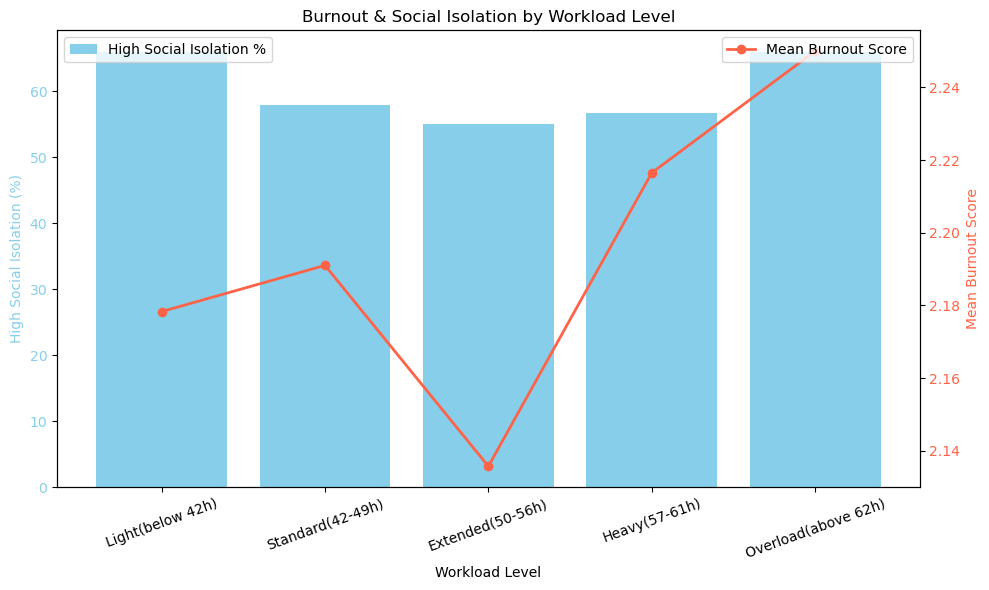

In [23]:
#Second Big Question: Working hours vs Burnout and Social Isolation

import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Ensure ordered workload categories ---
workload_order = ['Light(below 42h)', 'Standard(42-49h)', 'Extended(50-56h)', 'Heavy(57-61h)', 'Overload(above 62h)']
merged_df['Workload_Level'] = pd.Categorical(
    merged_df['Workload_Level'],
    categories=workload_order,
    ordered=True
)

# --- 2. Map Burnout_Level to numeric scale ---
burnout_map = {'Low': 1, 'Medium': 2, 'High': 3}
merged_df['Burnout_Score'] = merged_df['Burnout_Level'].map(burnout_map)

# --- 3. Calculate Social Isolation % and Mean Burnout Score ---
social_isolation_pct = (
    merged_df.groupby('Workload_Level')['Social_Isolation_Score']
    .apply(lambda x: (x >= 3).mean() * 100)  # % high isolation (>=3)
)

mean_burnout_score = merged_df.groupby('Workload_Level')['Burnout_Score'].mean()

# --- 4️⃣ Plot ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar: Social Isolation %
ax1.bar(social_isolation_pct.index, social_isolation_pct.values, color='skyblue', label='High Social Isolation %')
ax1.set_ylabel('High Social Isolation (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Workload Level')
ax1.set_xticklabels(social_isolation_pct.index, rotation=20)

# Line: Mean Burnout Score
ax2 = ax1.twinx()
ax2.plot(mean_burnout_score.index, mean_burnout_score.values, color='tomato', marker='o', linewidth=2, label='Mean Burnout Score')
ax2.set_ylabel('Mean Burnout Score', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

# Title & Legend
plt.title('Burnout & Social Isolation by Workload Level')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


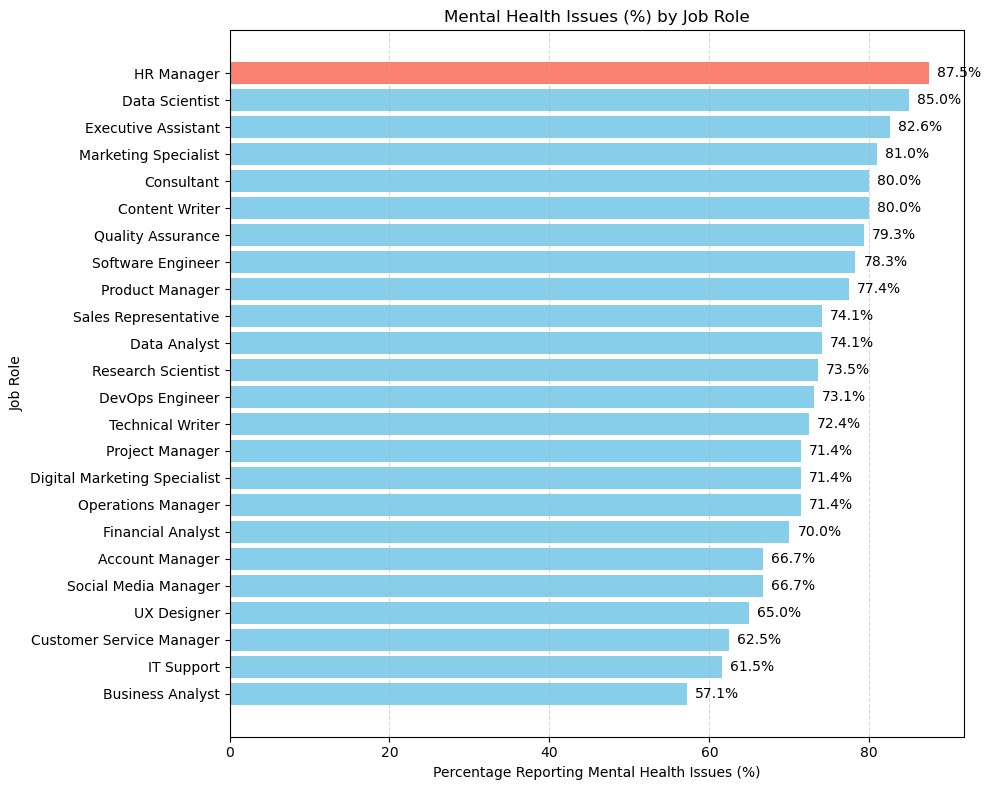

In [24]:
#Third Big Question: Job Role vs Mental Health

# --- Calculate % Mental Health "Yes" by Job Role ---
mental_by_role = (
    merged_df.groupby('Job_Role')['Mental_Health_Issues']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reset_index(name='Mental_Health_Percent')
    .sort_values('Mental_Health_Percent', ascending=True)   # ascending for horizontal chart
)

# --- Highlight HR Manager ---
colors = ['salmon' if role == 'HR Manager' else 'skyblue' for role in mental_by_role['Job_Role']]

# --- Plot Horizontal Bar Chart ---
plt.figure(figsize=(10,8))
plt.barh(
    mental_by_role['Job_Role'],
    mental_by_role['Mental_Health_Percent'],
    color=colors
)

# Add value labels
for i, val in enumerate(mental_by_role['Mental_Health_Percent']):
    plt.text(val + 1, i, f'{val:.1f}%', va='center')

# --- Aesthetics ---
plt.title('Mental Health Issues (%) by Job Role')
plt.xlabel('Percentage Reporting Mental Health Issues (%)')
plt.ylabel('Job Role')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


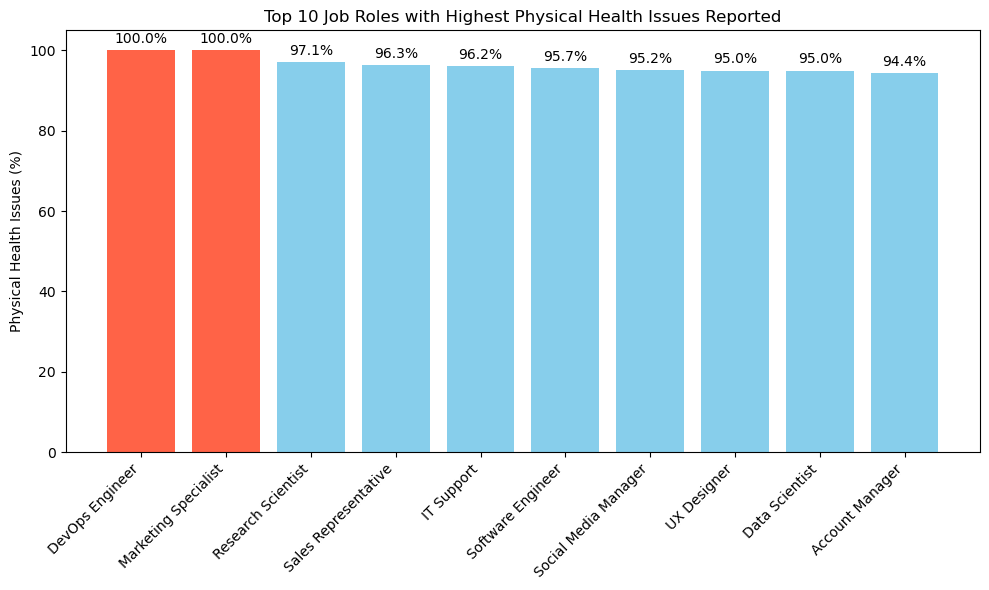

In [25]:
#Third Big Question: Job Role vs Physical Health

# Calculate % of "Yes" for each Job Role
physical_health_pct = (
    merged_df.groupby('Job_Role')['Physical_Health_Issues']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .sort_values(ascending=False)
)

# Take Top 10 Job Roles
top10 = physical_health_pct.head(10)

# Highlight specific roles
highlight_roles = ['DevOps Engineer', 'Marketing Specialist']
colors = ['tomato' if role in highlight_roles else 'skyblue' for role in top10.index]

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top10.index, top10.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Physical Health Issues (%)')
plt.title('Top 10 Job Roles with Highest Physical Health Issues Reported')

# Add value labels on top of bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f'{bar.get_height():.1f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


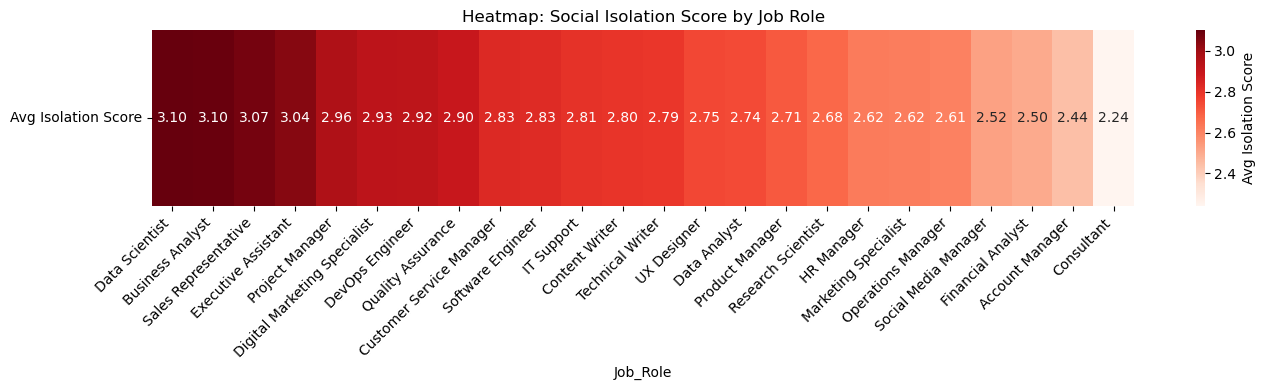

In [26]:
#Thirs Big Question: Job Role vs Social Isolation Mean

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Compute the mean Social Isolation Score per Job Role
isolation_by_role = (
    merged_df.groupby('Job_Role')['Social_Isolation_Score']
    .mean()
    .sort_values(ascending=False)
)

# 2️⃣ Convert to DataFrame suitable for heatmap
heatmap_df = isolation_by_role.to_frame().T  # make it a single-row dataframe
heatmap_df.index = ['Avg Isolation Score']

# 3️⃣ Plot heatmap
plt.figure(figsize=(14, 4))
sns.heatmap(
    heatmap_df,
    annot=True,
    cmap='Reds',
    cbar_kws={'label': 'Avg Isolation Score'},
    fmt='.2f'
)
plt.title('Heatmap: Social Isolation Score by Job Role')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


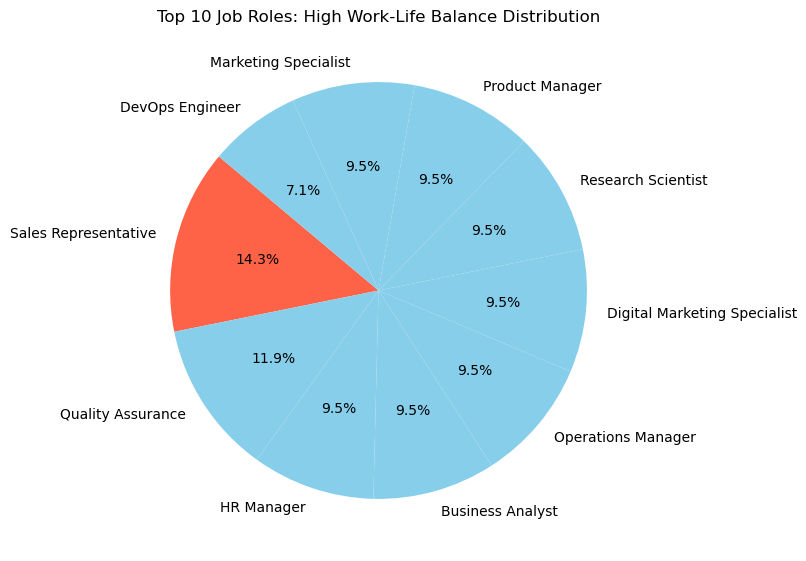

In [27]:
#Thirs Big Question: Job Role vs high('5') WLB score

# 1. Filter for High Work-Life Balance (score = 5)
high_wlb = merged_df[merged_df['Work_Life_Balance_Score'] == 5]

# 2. Count High WLB occurrences by Job Role and take top 10
top_roles = high_wlb['Job_Role'].value_counts().head(10)

# 3. Highlight role
colors = ['tomato' if role == 'Sales Representative' else 'skyblue' for role in top_roles.index]

# 4. Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_roles,
    labels=top_roles.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    textprops={'fontsize': 10}
)

plt.title('Top 10 Job Roles: High Work-Life Balance Distribution')

plt.tight_layout()
plt.show()


## 5️⃣ Data Insights

- Summarize your main takeaways. What patterns or trends did you find?

### 1. Relationship Between Salary and Flexibility
Finding: 
Hybrid work is most common across salary levels; Remote dominates < $50k.
By Job Role: Customer Service, QA, and Technical Writers have highest Remote share.
Pattern: Flexibility varies by salary and job type, with lower-paid roles sometimes offering more remote options.

### 2️. Health & Well-Being
Finding: Burnout increases with workload; Social Isolation dips slightly at 50–56h.
Pattern: Higher workload and longer hours generally harm well-being, though mid-range hours may encourage better social engagement.

### 3️. Job Role Impact
Mental Health: HR Managers (87.5%) & Data Scientists (85%) most affected.
Physical Health: DevOps & Marketing Specialists report 100% issues.
Work-Life Balance: Sales Reps lead in high scores.
Social Isolation: Highest in Data Scientists, lowest in Consultants.
Pattern: Job role strongly shapes employee well-being across mental, physical, and social dimensions.


#Employee well-being is influenced by both job role and workload: HR Managers and Data Scientists report the highest mental health strain, while DevOps and Marketing Specialists face the most physical health issues. Burnout generally rises with workload, though mid-range hours (50–56h/week) show slightly lower social isolation. Work flexibility varies by salary and role, with hybrid work most common overall and Remote work dominating in lower-paid positions.